# Create a linear taylor model

In this basic example we are going to build a local approximation of a model using the first order taylor decomposition:

$$\underline{y} \, \approx \, \widehat{h}(\underline{x}) \,
      = \, h(\underline{x}_0) \, +
        \, \sum_{i=1}^{n_{X}} \; \frac{\partial h}{\partial x_i}(\underline{x}_0).\left(x_i - x_{0,i} \right)$$
        
        
Here

$$h(x) = [cos(x_1 + x_2), (x2 + 1)* e^{x_1 - 2* x_2}]$$


In [1]:
from __future__ import print_function
import openturns as ot

# prepare some data
formulas = ['cos(x1 + x2)', '(x2 + 1) * exp(x1 - 2 * x2)']
model = ot.SymbolicFunction(['x1', 'x2'], formulas)
x  = [0.5, 0.5]

In [2]:
# create a linear least squares model
algo = ot.LinearTaylor(x, model)
algo.run()
responseSurface = algo.getResponseSurface()

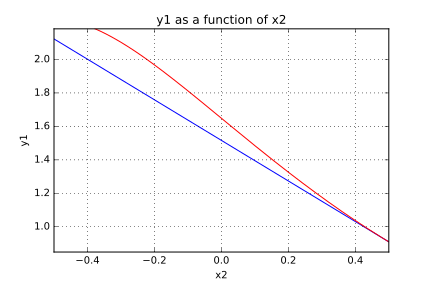

In [3]:
# plot 2nd output of our model with x1=0.5
graph = ot.ParametricFunction(responseSurface, [0], [0.5]).getMarginal(1).draw(-0.5, 0.5)
curve = ot.ParametricFunction(model, [0], [0.5]).getMarginal(1).draw(-0.5, 0.5).getDrawable(0)
curve.setColor('red')
graph.add(curve)
graph